## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [14]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [15]:
df = pd.read_csv('ENB2012_data.csv')
df.columns = ['Relative Compactness (ratio)', 'Surface Area(m²)', 'Wall Area(m²)', 'Roof Area(m²)', 'Overall Height (m)', 'Orientation (Degrees)', 'Glazing Area(m²)', 'Glazing Area Distribution (Ratio)','Heating Load (kWh)', 'Cooling Load (kWh)']

#### Show Top 5 Records

In [16]:
df.head()

,Relative Compactness (ratio),Surface Area(m²),Wall Area(m²),Roof Area(m²),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio),Heating Load (kWh),Cooling Load (kWh)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Preparing X and Y variables

In [17]:
X=df.iloc[:,:-2] ## independent features
y=df.iloc[:,-2:] ## dependent features

In [18]:
X.head()

,Relative Compactness (ratio),Surface Area(m²),Wall Area(m²),Roof Area(m²),Overall Height (m),Orientation (Degrees),Glazing Area(m²),Glazing Area Distribution (Ratio)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [19]:
y.head()

,Heating Load (kWh),Cooling Load (kWh)
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [20]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
        -1.76044698, -1.81457514],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
         1.2440492 ,  1.41133622]])

In [23]:
X.shape

(768, 8)

In [24]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((537, 8), (231, 8))

#### Create an Evaluate Function to give all metrics after model Training

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
from sklearn.multioutput import MultiOutputRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    multi_output_model = MultiOutputRegressor(model)
    multi_output_model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = multi_output_model.predict(X_train)
    y_test_pred = multi_output_model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.0416
- Mean Absolute Error: 2.1340
- R2 Score: 0.9026
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0918
- Mean Absolute Error: 2.2082
- R2 Score: 0.8994


Lasso
Model performance for Training set
- Root Mean Squared Error: 3.5377
- Mean Absolute Error: 2.5931
- R2 Score: 0.8684
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.5788
- Mean Absolute Error: 2.6007
- R2 Score: 0.8652


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.0451
- Mean Absolute Error: 2.1325
- R2 Score: 0.9024
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0955
- Mean Absolute Error: 2.2057
- R2 Score: 0.8992


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.0385
- Mean Absolute Error: 1.3201
- R2 Score: 0.9562
-----------------------

### Results

In [134]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.993664
5,Random Forest Regressor,0.982530
4,Decision Tree,0.973816
7,AdaBoost Regressor,0.945076
0,Linear Regression,0.903111
2,Ridge,0.900469
3,K-Neighbors Regressor,0.889713
1,Lasso,0.830206


# XGBRegressor

Accuracy of XGBoost Regressor: 99.36


C:\Users\Home\AppData\Local\Temp\ipykernel_12664\3078674926.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_xgb)


<Axes: ylabel='Density'>

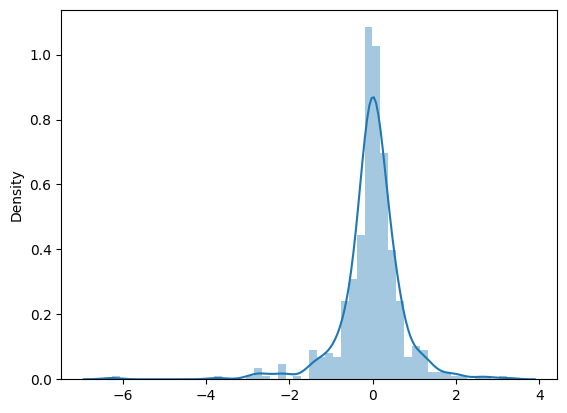

In [135]:
# Create XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
score_xgb = r2_score(y_test, y_pred_xgb) * 100
print("Accuracy of XGBoost Regressor: %.2f" % score_xgb)

sns.distplot(y_test-y_pred_xgb)

In [136]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_model,X,y,cv=5)
score.mean()

0.9686807125414498

## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

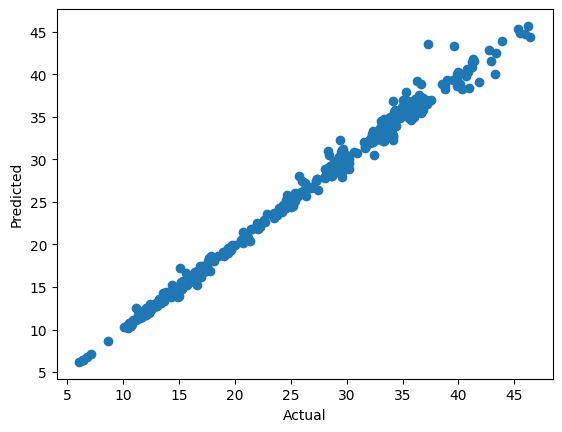

In [137]:
plt.scatter(y_test,y_pred_xgb)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [138]:
y_test.dtypes

Heating Load (kWh)    float64
Cooling Load (kWh)    float64
dtype: object

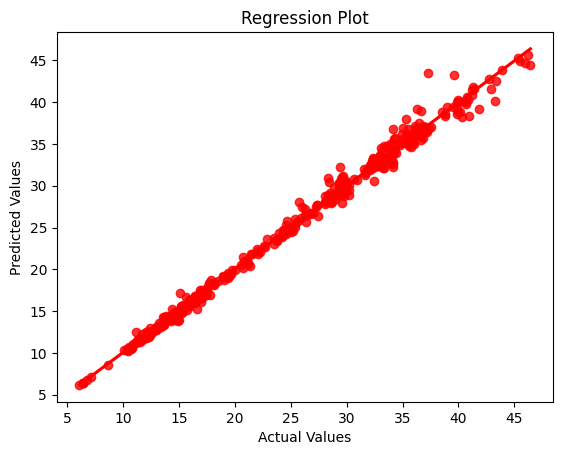

In [139]:
# Flatten y_test and y_pred
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred_xgb.flatten()

# Plot
sns.regplot(x=y_test_flat, y=y_pred_flat, ci=None, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')
plt.show()


#### Difference between Actual and Predicted Values

In [140]:
import pandas as pd

# Assuming 'Heating Load (kWh)' and 'Cooling Load (kWh)' are your target columns
target_columns = ['Heating Load (kWh)', 'Cooling Load (kWh)']

# Assuming y_test and y_pred are DataFrames with the same structure
pred_df = pd.DataFrame({
    'Actual Value - Heating': y_test[target_columns[0]].values,
    'Predicted Value - Heating': y_pred_xgb[:, 0],  # Assuming the first column corresponds to the first target variable
    'Difference - Heating': y_test[target_columns[0]].values - y_pred_xgb[:, 0],
    'Actual Value - Cooling': y_test[target_columns[1]].values,
    'Predicted Value - Cooling': y_pred_xgb[:, 1],  # Assuming the second column corresponds to the second target variable
    'Difference - Cooling': y_test[target_columns[1]].values - y_pred_xgb[:, 1],
})
pred_df

,Actual Value - Heating,Predicted Value - Heating,Difference - Heating,Actual Value - Cooling,Predicted Value - Cooling,Difference - Cooling
0,16.47,16.233847,0.236153,16.90,16.549847,0.350153
1,13.17,13.224684,-0.054684,16.39,15.968356,0.421644
2,32.82,32.362553,0.457447,32.78,32.728474,0.051526
3,41.32,41.831665,-0.511665,46.23,45.681179,0.548821
4,16.69,16.894554,-0.204554,19.76,19.977955,-0.217955
...,...,...,...,...,...,...
226,19.12,19.138748,-0.018748,21.93,22.490011,-0.560011
227,28.86,28.789320,0.070680,32.83,32.391293,0.438707
228,32.09,32.160896,-0.070896,31.70,31.613058,0.086942
229,17.35,17.429714,-0.079714,21.19,20.731775,0.458225


In [141]:
import pickle

# open a file, where you ant to store the data
file = open('XGBRegressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgb_model, file)